In [39]:
## Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

### Data Loading
The mnist dataset requires loading from pytorch or tensorflow. The code can be found in the torch documentation: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [38]:
df_train = pd.read_csv('data/fashion-mnist_train.csv')
df_test = pd.read_csv('data/fashion-mnist_test.csv')

In [41]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

### Data Visualization

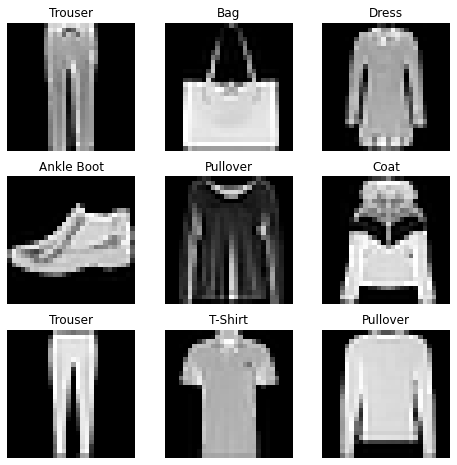

In [42]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Model

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Prepare the training and testing dataset 
X_train = df_train.iloc[:,1:]/255
y_train = df_train.iloc[:,0]

X_test = df_test.iloc[:,1:]/255
y_test = df_test.iloc[:,0]

In [56]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

In [58]:
# * unpack the tuple
X_train = X_train.values.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.values.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.values.reshape(X_validate.shape[0], *(28, 28, 1))